<a href="https://colab.research.google.com/github/carillo-hub/ENPM661/blob/main/proj4_backup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


In [ ]:
import shutil
import os
import cv2
import sys

root_dir = '/content/drive/MyDrive/Fish_Dataset'
dump_dir = '/content/drive/MyDrive/Data_Dump/'
dump_gt_dir = '/content/drive/MyDrive/GT_Dump/'

subdirs = ['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', 'Red Sea Bream', 'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']
post = '.png'
GT = "GT"

!rm -r /content/drive/MyDrive/Data_Dump/
!rm -r /content/drive/MyDrive/GT_Dump/
!mkdir /content/drive/MyDrive/Data_Dump/
!mkdir /content/drive/MyDrive/GT_Dump/


print("Copying all input imgs to the Data_Dump dir. This requires <10GB of space and will take some time...")

counter = 0

for each in subdirs:
  gather_data = os.path.join(root_dir, each, each)
  #gather_GT_data = os.path.join(root_dir, each, str(each + ' GT'))
 
  print("Gathering data from: ", gather_data)

  for file in os.listdir(gather_data):
    if file.endswith(".png"):
      fullname = os.path.join(gather_data,file)
      img = cv2.imread(fullname)
      img_cp = img.copy()

      #fullnameGT = os.path.join(gather_GT_data,file)
      #imgGT = cv2.imread(fullnameGT)
      #img_cpGT = imgGT.copy()

      counter += 1

      new_name = str(f"{counter}{post}")
      new_fullname = os.path.join(dump_dir,new_name)
      cv2.imwrite(new_fullname, img_cp)

      #new_nameGT = str(f"{each}{counter}{GT}{post}")
      #new_fullnameGT = os.path.join(dump_gt_dir,new_nameGT)
      #cv2.imwrite(new_fullnameGT, img_cpGT)

      if counter % 1000 ==0:
        print("Finished gathering data from ",each)


Copying all input imgs to the Data_Dump dir. This requires <10GB of space and will take some time...
Gathering data from:  /content/drive/MyDrive/Fish_Dataset/Black Sea Sprat/Black Sea Sprat
Finished gathering data from  Black Sea Sprat
Gathering data from:  /content/drive/MyDrive/Fish_Dataset/Gilt-Head Bream/Gilt-Head Bream
Finished gathering data from  Gilt-Head Bream
Gathering data from:  /content/drive/MyDrive/Fish_Dataset/Hourse Mackerel/Hourse Mackerel
Finished gathering data from  Hourse Mackerel
Gathering data from:  /content/drive/MyDrive/Fish_Dataset/Red Mullet/Red Mullet
Finished gathering data from  Red Mullet
Gathering data from:  /content/drive/MyDrive/Fish_Dataset/Red Sea Bream/Red Sea Bream
Finished gathering data from  Red Sea Bream
Gathering data from:  /content/drive/MyDrive/Fish_Dataset/Sea Bass/Sea Bass
Finished gathering data from  Sea Bass
Gathering data from:  /content/drive/MyDrive/Fish_Dataset/Shrimp/Shrimp
Finished gathering data from  Shrimp
Gathering data f

In [ ]:
import os
dump_dir = '/content/drive/MyDrive/Data_Dump/'
print(len(os.listdir(dump_dir)))

9000


In [1]:
import numpy as np
import csv

with open('/content/drive/MyDrive/train_all.csv', mode='w+') as train_file:
    writer = csv.writer(train_file, delimiter=',', quotechar='"', quoting=csv.QUOTE_MINIMAL)

    for i in range(0,9001):
        if i<=1000:
          class_label = 0
          species = 'Black_Sea_Sprat'
        if i>1000:
            class_label = 1
            species = 'Gilt-Head_Bream'
        if i>2000:
            class_label = 2
            species = 'Hourse_Mackerel'
        if i>3000:
            class_label = 3
            species = 'Red_Mullet' 
        if i>4000:
            class_label = 4
            species = 'Red_Sea_Bream'
        if i>5000:
            class_label = 5
            species = 'Sea_Bass'
        if i>6000:
            class_label = 6
            species = 'Shrimp'
        if i>7000:
            class_label = 7
            species = 'Striped_Red_Mullet'
        if i>8000:
            class_label = 8
            species = 'Trout'

        writer.writerow(['{}'.format(species),'{}.png'.format(i),'{}'.format(class_label)])

print("Finished making the training sheet")

Finished making the training sheet


In [1]:
!pip3 install cnn_finetune

dump_dir = '/content/drive/MyDrive/Data_Dump/'

use_gpu=0
import torch
if torch.cuda.is_available():
    device = torch.device("cuda")
    use_gpu=1 
    print ("CUDA Available")




from cnn_finetune import make_model
PATH = 'vgg16.pt'
model = make_model('vgg16', num_classes=9, pretrained=False, input_size=(590,445))



import pandas as pd
import numpy as np
import os 
from torch.utils.data import Dataset, DataLoader
from skimage import io, transform

class Dataloader(Dataset):

    def __init__(self, csv_file, root_dir, transform=None):

        self.data = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.data.iloc[idx, 1])

        image = io.imread(img_name)
        #print(img_name)


        class_label = self.data.iloc[idx, 2]
        class_label = np.array([class_label])
        class_label = class_label.astype('long').reshape(1, 1)
        class_label = torch.LongTensor(class_label)

        sample = {'image': image, 'class_label': class_label}
        #sample = [image,class_label]


        if self.transform:
            image1 = self.transform(sample['image'])
            image1 = torch.FloatTensor(image1)
            sample = {'image': image1, 'class_label': class_label}
            #sample = [image1, class_label]

        return sample





     |████████████████████████████████| 61kB 8.0MB/s 
  Created wheel for cnn-finetune: filename=cnn_finetune-0.6.0-cp37-none-any.whl size=11432 sha256=6bfa306c899579a715e3ff16fd20b41331644ec9d3f6ab269b1a5dcf5cf77bbc
  Stored in directory: /root/.cache/pip/wheels/12/4f/29/32978e72b606c5f51b6bd10117814deb46c6b63230eef49381
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-cp37-none-any.whl size=60963 sha256=4c7e96b4ccadb74c5106306db8893cebc2d2c58f13976275e19fb2666bfe68b2
  Stored in directory: /root/.cache/pip/wheels/69/df/63/62583c096289713f22db605aa2334de5b591d59861a02c2ecd
Successfully built cnn-finetune pretrainedmodels
CUDA Available


In [2]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from os import path
from torchvision import datasets, models, transforms, utils

BATCH_SIZE = 8

## transformations
transform = transforms.Compose([transforms.ToTensor()])

## download and load training dataset
trainset = Dataloader(csv_file = '/content/drive/MyDrive/train_all.csv', root_dir = dump_dir, transform=transform)

trsize = int(9000*0.8)
tesize = int(9000*0.2)
trainset, testset = torch.utils.data.random_split(trainset,[trsize,tesize])

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)



model_ft = model.to(device)

if use_gpu == 1:
    model_ft = nn.DataParallel(model_ft).cuda()

if path.exists(PATH):
  model_ft.load_state_dict(torch.load(PATH))

criterion = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


#optimizer = optim.SGD(model_ft.parameters(), lr=lr, momentum=0.9, weight_decay=0.005)
#exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()







Epoch number is 1
Test Accuracy: 10.99

 Epoch number is 1.
Epoch number is 2
Test Accuracy: 10.16

 Epoch number is 2.
Epoch number is 3
Test Accuracy: 10.71

 Epoch number is 3.
Epoch number is 4
Test Accuracy: 10.16

 Epoch number is 4.


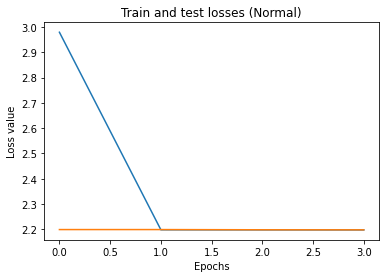

In [3]:

import matplotlib
import matplotlib.pyplot as plt
from torchvision import datasets, models, transforms, utils



epochs = 4
trainloss = []
testloss = []
tta = []
toa = []
trainrsqarr = []
testrsqarr = []
rdeftrain = 0
rdeftest = 0

def train(epoch):
    global rdeftrain
    total_loss = 0
    total_size = 0
    traintargetarr = []
    trainoutputarr = []
    train_acc=0
    model_ft.train()

    print ("Epoch number is {}".format(epoch))

    for batch_idx, values in enumerate(trainloader):
        
        data, target = values['image'], values['class_label']

        target = target.view(-1,1)

        data, target = data.to(device), target.to(device)        

        output = model_ft(data)

        traintargetarr.append(target.tolist())
        trainoutputarr.append(output.tolist())

        loss = criterion(output, target.squeeze())
        total_loss += loss.item()
        total_size += 1
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_acc += get_accuracy(output, target, BATCH_SIZE)

        #print((total_loss/total_size)*100)

    tta = np.array(traintargetarr)
    tta = [val for sublist in traintargetarr for val in sublist]
    tta = np.array(tta)
    toa = np.array(trainoutputarr)
    toa = [val for sublist in trainoutputarr for val in sublist]
    toa = np.array(toa)

    trainloss.append((total_loss/total_size))
  


def test():
    global tta,toa,rdeftest
    model_ft.eval()
    test_loss = 0
    total_loss = 0
    total_size = 0
    test_acc = 0.0

    testtargetarr = []
    testoutputarr = []

    with torch.no_grad():
        for batch_idx, values in enumerate(testloader):

            data, target = values['image'], values['class_label']

            target = target.view(-1,1)

            data, target = data.to(device), target.to(device)

            output = model_ft(data)

            loss = criterion(output, target.squeeze())

            total_loss += loss.item()

            total_size += 1
        
            testtargetarr.append(target.tolist())
            testoutputarr.append(output.tolist())

            #print ("Loss is {}".format(loss*100))


    for batch_idx, values in enumerate(testloader, 0):
        data, target = values['image'], values['class_label']
        target = target.view(-1,1)
        data, target = data.to(device), target.to(device)
        output = model_ft(data)
        test_acc += get_accuracy(output, target, BATCH_SIZE)
        
    print('Test Accuracy: %.2f'%( test_acc/batch_idx))




    tta = np.array(testtargetarr)
    tta = [val for sublist in testtargetarr for val in sublist]
    tta = np.array(tta)
    toa = np.array(testoutputarr)
    toa = [val for sublist in testoutputarr for val in sublist]
    toa = np.array(toa)
    testloss.append(total_loss/total_size)
    

for epoch in range(1, epochs + 1):
    train(epoch)
    test()
    print ("\n Epoch number is {}.".format(epoch))

   # if epoch % 1 == 0:
     #   print("Loss at epoch {} is {}%".format(epoch,100*(fincorr/epoch)))


trainloss = np.array(trainloss)
testloss = np.array(testloss)

trainrsqarr = np.array(trainrsqarr)
testrsqarr = np.array(testrsqarr)

file = open("/content/drive/MyDrive/vgg16.csv","w+")

file.write("Train loss values are \n")

for i in range(len(trainloss)):
    file.write("{},".format(trainloss[i]))

file.write("\n Test loss values are \n")

for i in range(len(testloss)):
    file.write("{},".format(testloss[i]))


file.close()

t = np.arange(0,epochs,1)

plt.plot(t,trainloss,t,testloss)
plt.xlabel("Epochs")
plt.ylabel("Loss value")
plt.title("Train and test losses (Normal)")
plt.show()